In [63]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [64]:
# loading the data into the dataframe
df = pd.read_csv('/content/Bangalore_Bapuji.csv')
print(df)

            Time Stamp        PM10        NO2        CO      Ozone       Temp  \
0        1/2/2019 0:00  110.720000  77.810000  1.040000  85.090000  25.120000   
1        2/2/2019 0:00  104.840000  80.230000  0.940000  83.290000  24.060000   
2        3/2/2019 0:00   87.570000  67.540000  0.750000  95.850000  23.890000   
3        4/2/2019 0:00   83.150000  67.620000  0.930000  62.250000  23.780000   
4        5/2/2019 0:00   86.120000  65.070000  0.770000  90.850000  23.760000   
...                ...         ...        ...       ...        ...        ...   
1851  26-02-2024 00:00   62.410000   8.490000  0.600000   9.120000  38.330000   
1852  27-02-2024 00:00   80.310000   8.360000  0.550000  12.980000  38.050000   
1853  28-02-2024 00:00   82.890000   8.710000  0.600000  12.260000  38.840000   
1854  29-02-2024 00:00   89.390000   8.460000  0.600000  13.640000  39.100000   
1855               NaN   75.597002  24.666323  0.743984  23.563493  26.040857   

             RH  
0     53.

In [65]:
# viewing info about the columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time Stamp  1855 non-null   object 
 1   PM10        1856 non-null   float64
 2   NO2         1856 non-null   float64
 3   CO          1856 non-null   float64
 4   Ozone       1856 non-null   float64
 5   Temp        1856 non-null   float64
 6   RH          1856 non-null   float64
dtypes: float64(6), object(1)
memory usage: 101.6+ KB


In [66]:
#viewing few rows from the top
df.head()

,Time Stamp,PM10,NO2,CO,Ozone,Temp,RH
0,1/2/2019 0:00,110.72,77.81,1.04,85.09,25.12,53.17
1,2/2/2019 0:00,104.84,80.23,0.94,83.29,24.06,53.06
2,3/2/2019 0:00,87.57,67.54,0.75,95.85,23.89,53.47
3,4/2/2019 0:00,83.15,67.62,0.93,62.25,23.78,53.59
4,5/2/2019 0:00,86.12,65.07,0.77,90.85,23.76,56.34


In [33]:
#number of rows and columns in the dataset
print(df.shape)

(1856, 7)


In [34]:
#statistical information about columns
print(df.describe())

              PM10          NO2           CO        Ozone         Temp  \
count  1856.000000  1856.000000  1856.000000  1856.000000  1856.000000   
mean     75.597002    24.666323     0.743984    23.563493    26.040857   
std      32.000150    20.128631     0.273817    19.546126     3.898506   
min       3.420000     0.100000     0.080000     0.100000    15.230000   
25%      50.887500     9.427500     0.540000    11.187500    24.020000   
50%      74.450000    17.595000     0.730000    16.900000    26.040000   
75%      96.895000    32.442500     0.910000    25.457500    28.550000   
max     238.660000   105.190000     2.740000   115.220000    39.900000   

                RH  
count  1856.000000  
mean     63.456911  
std      16.226898  
min      16.320000  
25%      49.537500  
50%      64.390000  
75%      75.930000  
max      95.580000  


In [67]:
#checking how many null values are in each column
df.isnull().sum()

Time Stamp    1
PM10          0
NO2           0
CO            0
Ozone         0
Temp          0
RH            0
dtype: int64

In [68]:
# dropping all the rows with NaN values
df = df.dropna()

In [89]:
#defining training and testing data
x_train = df[:1484]
y_train = x_train['Ozone']
x_test = df[1484:2966]
y_test = x_test['Ozone']
print(y_test)

1484    17.41
1485    17.96
1486    23.05
1487    21.54
1488    21.87
        ...  
1850    18.64
1851     9.12
1852    12.98
1853    12.26
1854    13.64
Name: Ozone, Length: 371, dtype: float64


In [90]:
df.loc[1484:2966].count() / df.shape[0] * 100

Time Stamp    20.0
PM10          20.0
NO2           20.0
CO            20.0
Ozone         20.0
Temp          20.0
RH            20.0
dtype: float64

In [91]:
#Normalizing training data
train_norm = x_train['Ozone']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.73827311]
[0.72263725]
[0.83174079]
[0.53987144]
[0.78830785]


In [92]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  1


In [93]:
#removing null values
train_norm = train_norm[train_norm!=0]

In [94]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['Ozone']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.49969861]
[0.53285112]
[0.83966245]
[0.74864376]
[0.76853526]


In [95]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  1


In [96]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [97]:
print(train_norm.shape)
print(test_norm.shape)

(1483,)
(370,)


In [98]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [99]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)
    print(y_split_train)

[[[0.73827311]
  [0.72263725]
  [0.83174079]]

 [[0.72263725]
  [0.83174079]
  [0.53987144]]

 [[0.83174079]
  [0.53987144]
  [0.78830785]]

 ...

 [[0.17755386]
  [0.18042043]
  [0.16756428]]

 [[0.18042043]
  [0.16756428]
  [0.18676164]]

 [[0.16756428]
  [0.18676164]
  [0.17008339]]]
[0.53987144 0.78830785 0.9994788  ... 0.18676164 0.17008339 0.183287  ]
[[[0.73827311]
  [0.72263725]
  [0.83174079]]

 [[0.72263725]
  [0.83174079]
  [0.53987144]]

 [[0.83174079]
  [0.53987144]
  [0.78830785]]

 ...

 [[0.17755386]
  [0.18042043]
  [0.16756428]]

 [[0.18042043]
  [0.16756428]
  [0.18676164]]

 [[0.16756428]
  [0.18676164]
  [0.17008339]]]
[0.53987144 0.78830785 0.9994788  ... 0.18676164 0.17008339 0.183287  ]
[[[0.73827311]
  [0.72263725]
  [0.83174079]]

 [[0.72263725]
  [0.83174079]
  [0.53987144]]

 [[0.83174079]
  [0.53987144]
  [0.78830785]]

 ...

 [[0.17755386]
  [0.18042043]
  [0.16756428]]

 [[0.18042043]
  [0.16756428]
  [0.18676164]]

 [[0.16756428]
  [0.18676164]
  [0.1700

In [100]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.49969861 0.53285112 0.83966245] 0.7486437613019891
[0.53285112 0.83966245 0.74864376] 0.7685352622061482
[0.83966245 0.74864376 0.76853526] 0.7130801687763711
[0.74864376 0.76853526 0.71308017] 0.7371910789632309
[0.76853526 0.71308017 0.73719108] 0.7799879445449064


In [101]:
# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Optimizers
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# For RMSprop, the following line is an example, but it's commented out since you're not using it in the final compilation
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile the model with the Adam optimizer
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

# Now you can fit the model with your data
# model.fit(X_train, y_train, epochs=200, verbose=0)

In [102]:
# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10
47/47 [==============================] - 2s 9ms/step - loss: 0.0502 - accuracy: 0.0000e+00 - val_loss: 0.0591 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.0000e+00 - val_loss: 0.0235 - val_accuracy: 0.0027
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 6.7568e-04 - val_loss: 0.0110 - val_accuracy: 0.0027
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 6.7568e-04 - val_loss: 0.0095 - val_accuracy: 0.0027
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 6.7568e-04 - val_loss: 0.0094 - val_accuracy: 0.0027
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 6.7568e-04 - val_loss: 0.0094 - val_accuracy: 0.0027
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 6.7568e-04 - val_loss: 0.0096 - val_accur

In [103]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [104]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

12/12 [==============================] - 0s 2ms/step
[0.5744374]
[0.6364656]
[0.7010623]
[0.6638945]
[0.6631676]


In [105]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE: %.5f' % rmse)
# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_split_test, yhat)
print('MAPE: %.5f' % mape)
# R-squared (R²)
r2 = abs(r2_score(y_split_test, yhat))
print('R²: %.5f' % r2)
accuracy = 100 - mape
print('Accuracy: %.5f%%' % accuracy)

MSE: 0.00917
RMSE: 0.09577
MAPE: 0.20702
R²: 0.87685
Accuracy: 99.79298%


In [106]:

yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

12/12 [==============================] - 0s 2ms/step
[0.5744374]
[0.6364656]
[0.7010623]
[0.6638945]
[0.6631676]


In [107]:
# Assuming min-max scaling was used
min_target = 0
max_target = 1

# Denormalize the predictions
for i in range(5):
    denorm_yhat = yhat[i] * (max_target - min_target) + min_target
    print(denorm_yhat)

[0.5744374]
[0.6364656]
[0.7010623]
[0.6638945]
[0.6631676]


In [57]:
# Denormalize X_split_test and y_split_test
denorm_X_split_test = scaler.inverse_transform(X_split_test.reshape(-1, 1))
denorm_X_split_test = denorm_X_split_test.reshape(X_split_test.shape)
denorm_y_split_test = scaler.inverse_transform(y_split_test.reshape(-1, 1)).reshape(y_split_test.shape)

# Print some of the denormalized sequences
for i in range(5):
    print(denorm_X_split_test[i])
    print(denorm_y_split_test[i])

[[75.25]
 [85.97]
 [80.64]]
74.41
[[85.97]
 [80.64]
 [74.41]]
76.68
[[80.64]
 [74.41]
 [76.68]]
62.32000000000001
[[74.41]
 [76.68]
 [62.32]]
75.22
[[76.68]
 [62.32]
 [75.22]]
84.18


In [58]:
denorm_yhat = model.predict(denorm_X_split_test)
for i in range(5):
    print(denorm_yhat[i])

12/12 [==============================] - 0s 3ms/step
[276.4473]
[280.33133]
[269.10916]
[247.1133]
[250.2058]


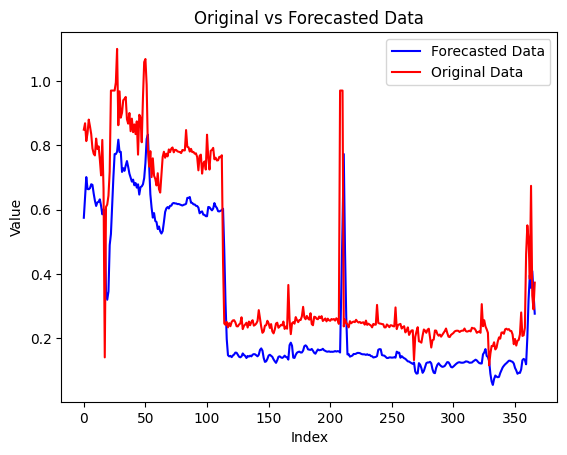

In [108]:
# Plot forecasted data (yhat)
plt.plot(yhat, label='Forecasted Data', color='blue')

# Plot original data (y_split_test) with some vertical offset
plt.plot(y_split_test+ 0.1, label='Original Data', color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Original vs Forecasted Data')
plt.show()

In [60]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00068, Test: 0.00000


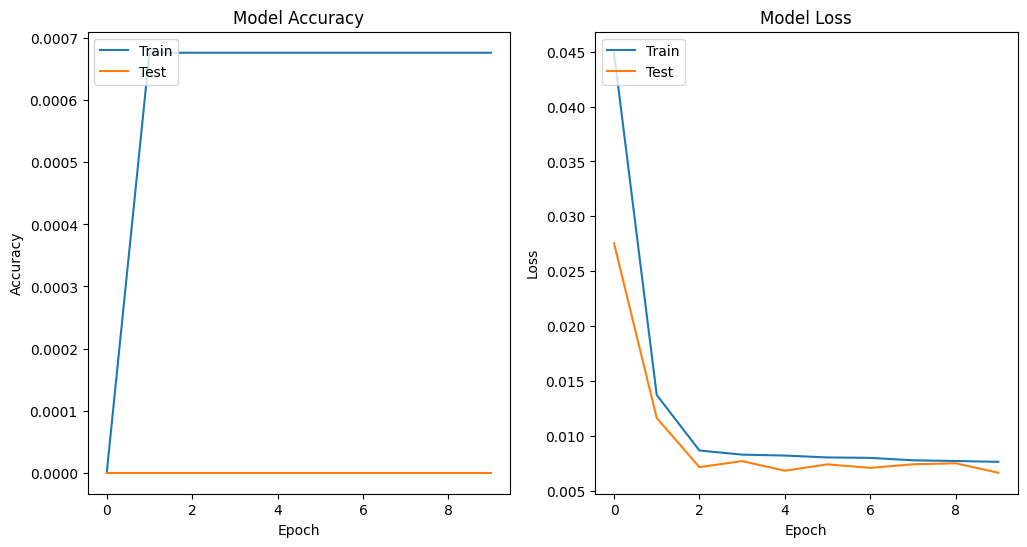

In [61]:

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot model accuracy
ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot model loss
ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

# Display the plots
plt.show()

In [ ]:
def compute(var):
    train_norm = x_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]

    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)
    mse = mean_squared_error(y_split_test, yhat)
    print(mse)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
47/47 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 6.7568e-04 - val_loss: 0.0082 - val_accuracy: 0.0027
Epoch 2/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0072 - accuracy: 6.7568e-04 - val_loss: 0.0088 - val_accuracy: 0.0027
Epoch 3/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7568e-04 - val_loss: 0.0083 - val_accuracy: 0.0027
Epoch 4/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0085 - val_accuracy: 0.0027
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0081 - val_accuracy: 0.0027
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0090 - val_accuracy: 0.0027
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0085 - val_accuracy

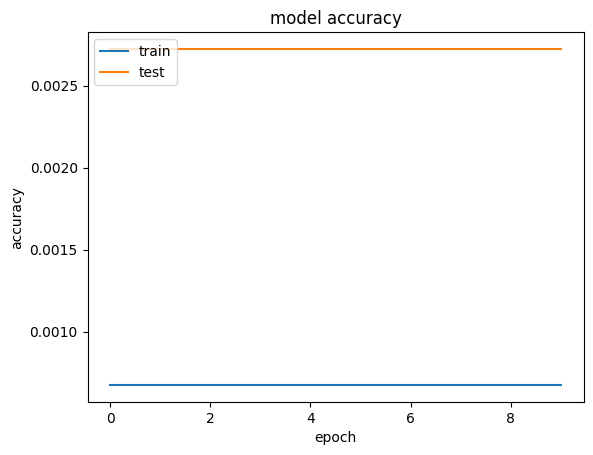

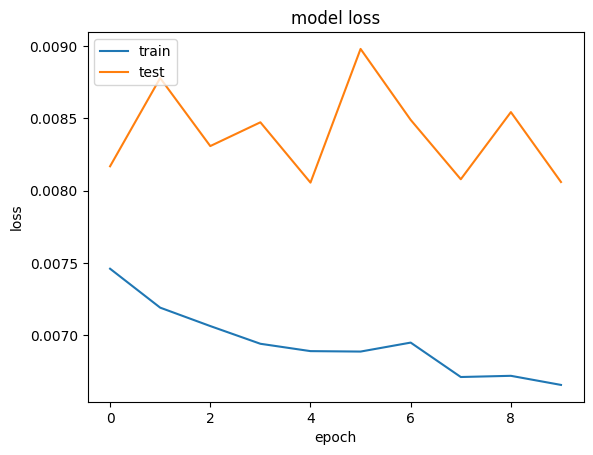

In [ ]:
compute('Ozone')

Epoch 1/10
47/47 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 6.7659e-04 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 6.7659e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 3/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 4/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 5/10
47/47 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 6/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 7/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 6.7659e-04 - val_loss

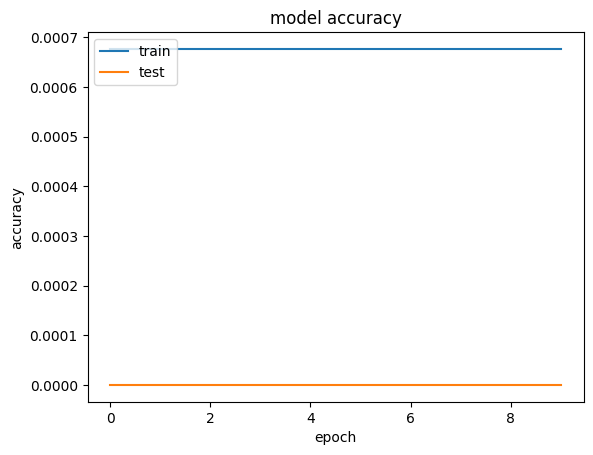

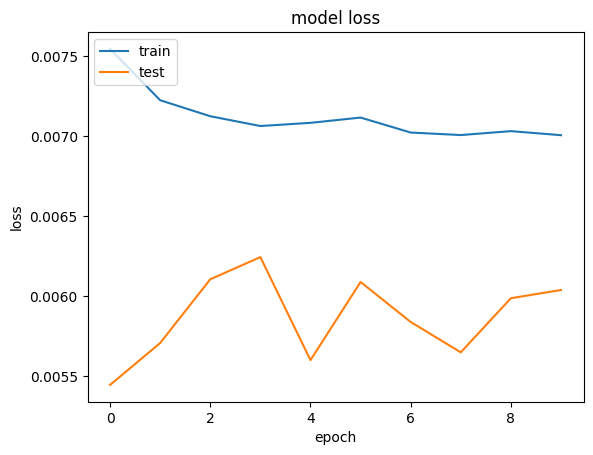

In [ ]:
compute('NO2')

Epoch 1/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 3/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss

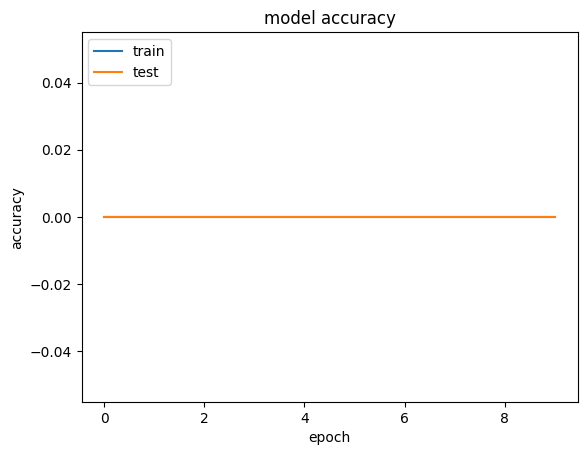

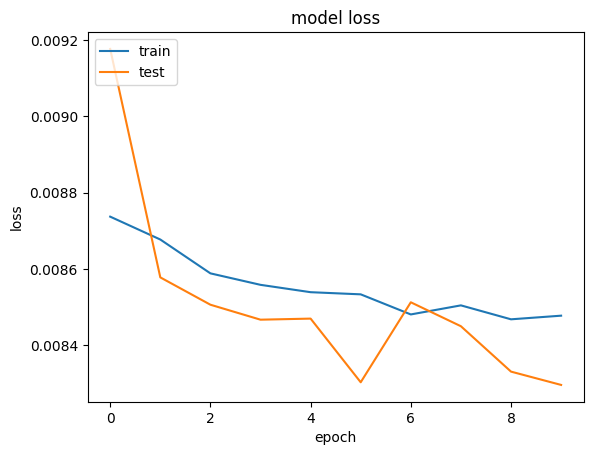

In [ ]:
compute('CO')

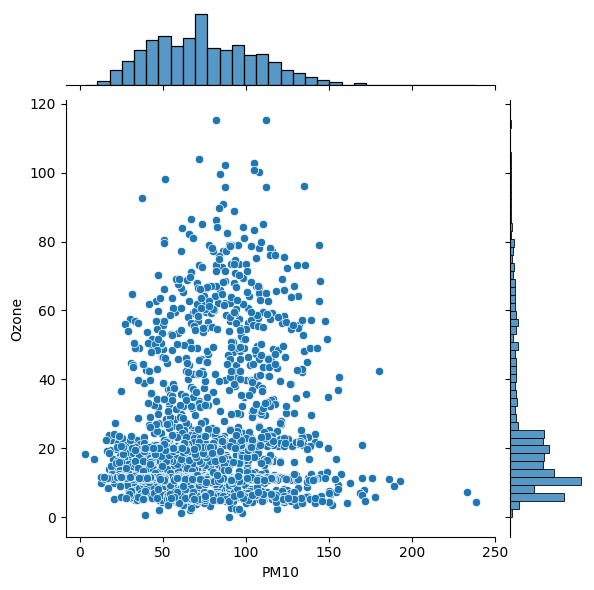

In [ ]:
sns.jointplot(x=df['PM10'], y=df['Ozone'], data = df)

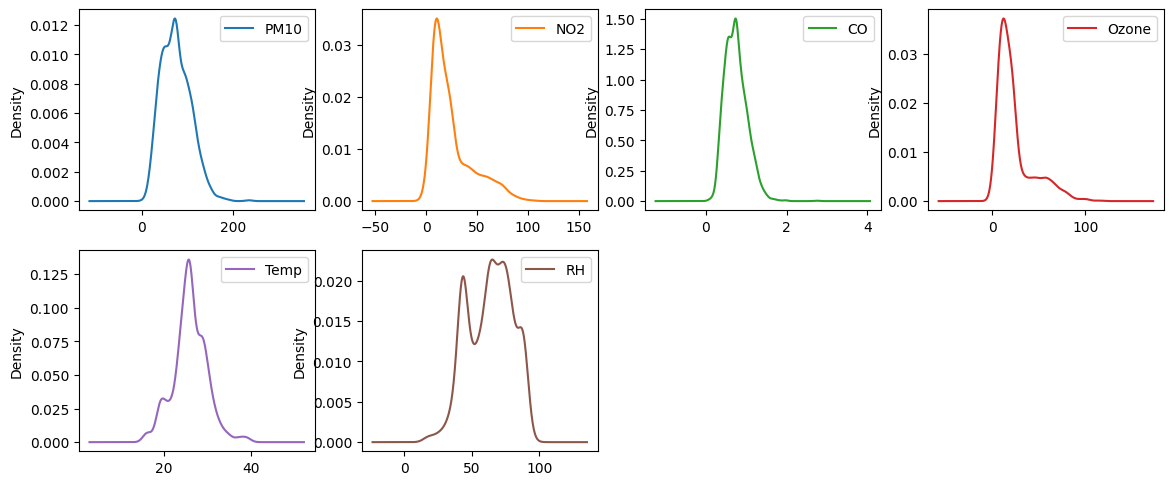

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(14,12))
plt.show()

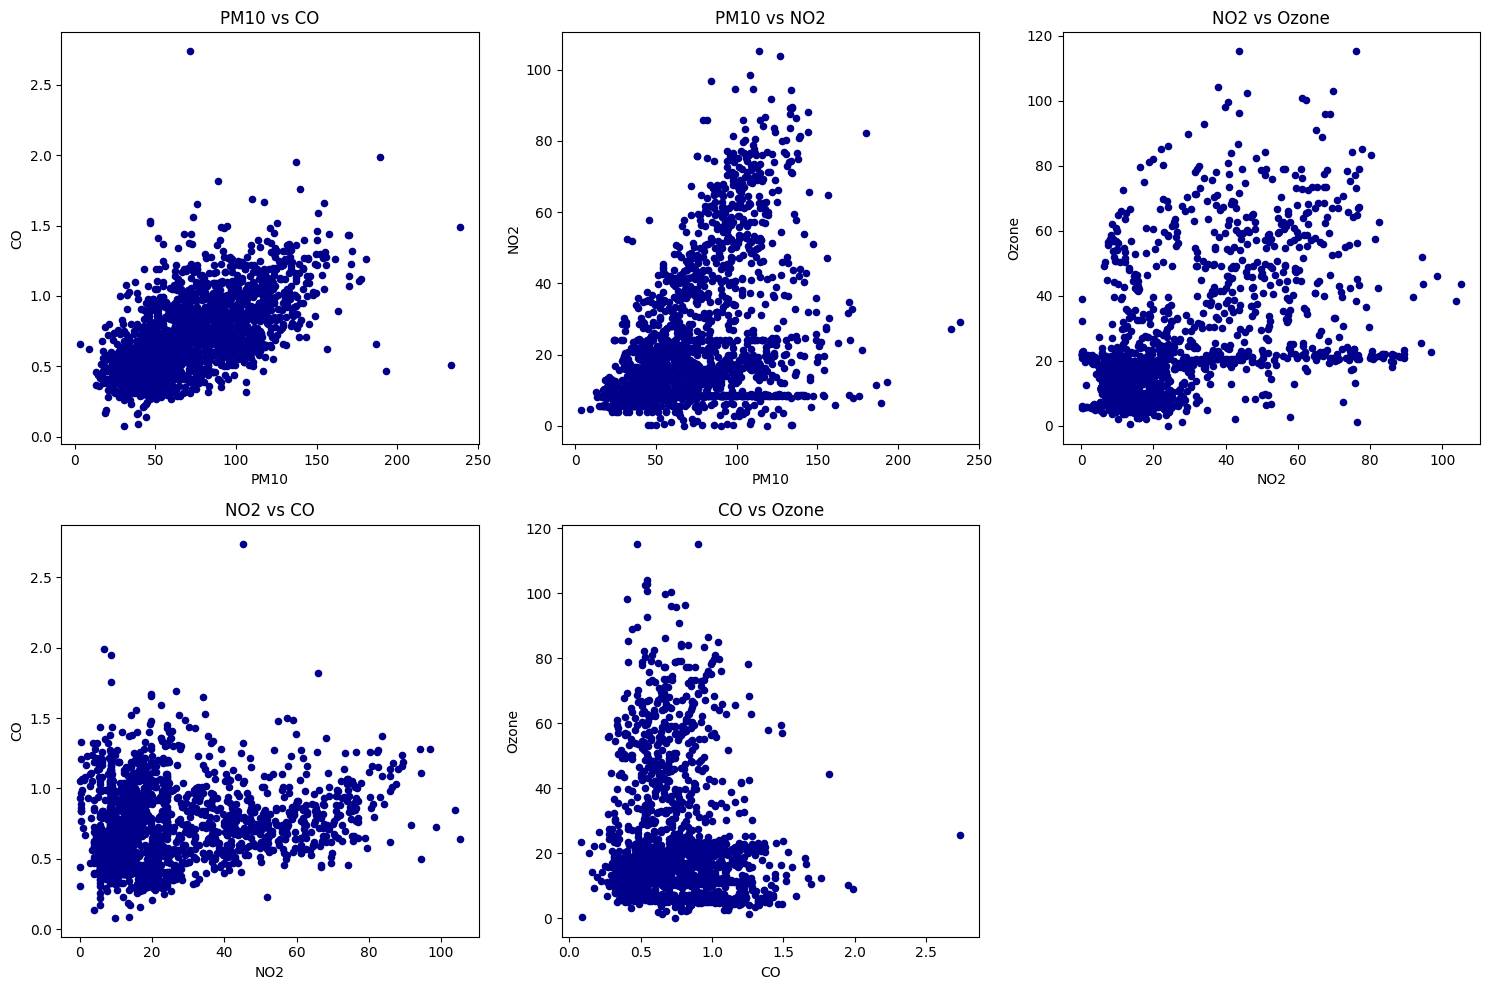

In [ ]:

# Create a figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the scatter plots
df.plot.scatter(x='PM10', y='CO', c='DarkBlue', ax=axs[0, 0])
axs[0, 0].set_title('PM10 vs CO')

df.plot.scatter(x='PM10', y='NO2', c='DarkBlue', ax=axs[0, 1])
axs[0, 1].set_title('PM10 vs NO2')

df.plot.scatter(x='NO2', y='Ozone', c='DarkBlue', ax=axs[0, 2])
axs[0, 2].set_title('NO2 vs Ozone')

df.plot.scatter(x='NO2', y='CO', c='DarkBlue', ax=axs[1, 0])
axs[1, 0].set_title('NO2 vs CO')

df.plot.scatter(x='CO', y='Ozone', c='DarkBlue', ax=axs[1, 1])
axs[1, 1].set_title('CO vs Ozone')

# Remove the last subplot as it's not needed
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()



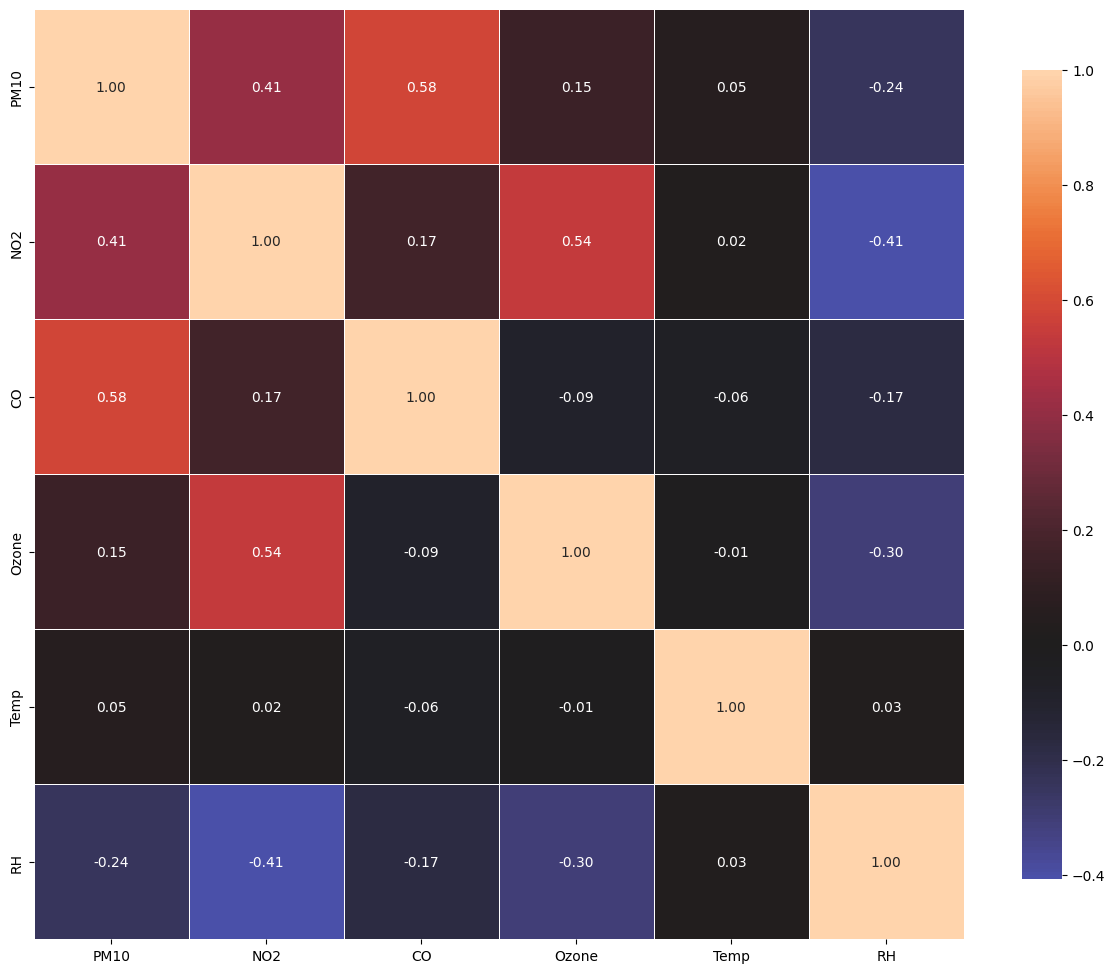

In [ ]:


# Convert non-numeric columns to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values
df_numeric = df_numeric.dropna(axis=1)

# Calculate correlations
correlations = df_numeric.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()


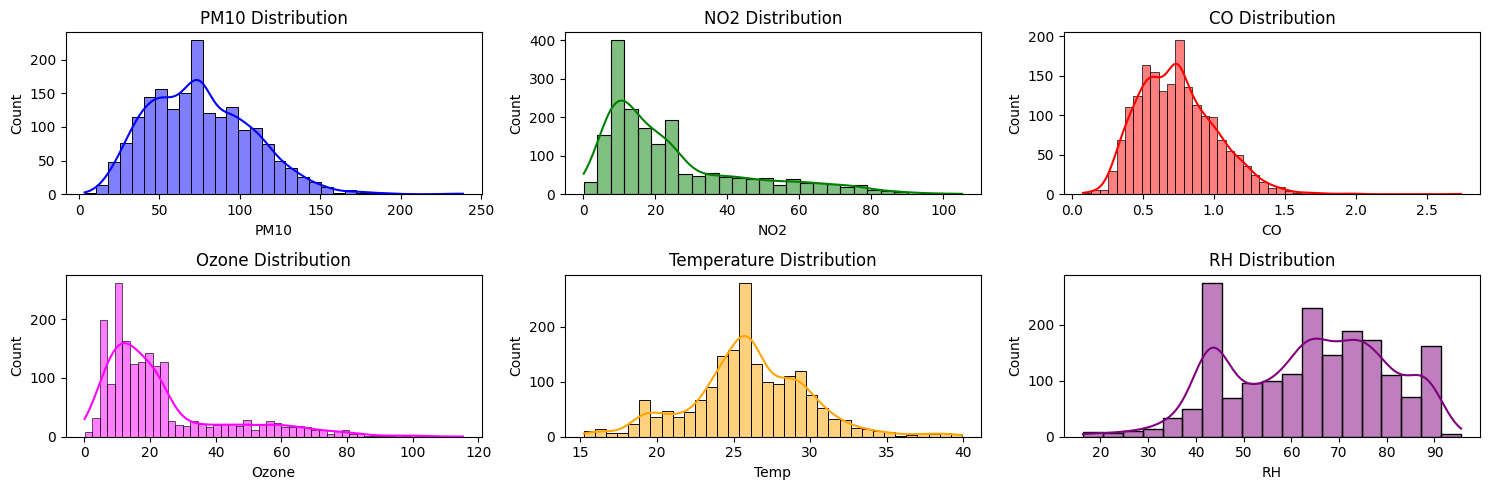

In [ ]:
# Plot histograms for visual inspection
plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
sns.histplot(df['PM10'], kde=True, color='blue')
plt.title('PM10 Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['NO2'], kde=True, color='green')
plt.title('NO2 Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['CO'], kde=True, color='red')
plt.title('CO Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['Ozone'], kde=True, color='magenta')
plt.title('Ozone Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['Temp'], kde=True, color='orange')
plt.title('Temperature Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['RH'], kde=True, color='purple')
plt.title('RH Distribution')

plt.tight_layout()
plt.show()



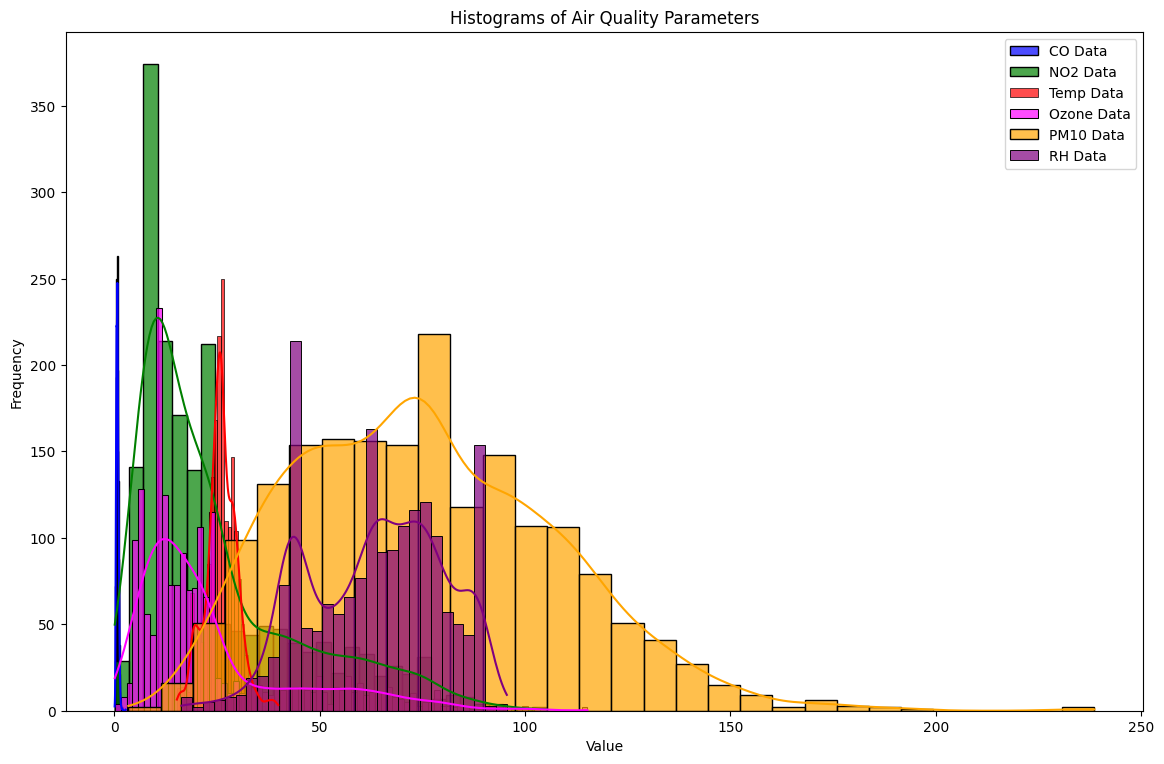

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histograms for each air quality parameter
sns.histplot(df['CO'], bins=30, kde=True, color='blue', alpha=0.7, label='CO Data')
sns.histplot(df['NO2'], bins=30, kde=True, color='green', alpha=0.7, label='NO2 Data')
sns.histplot(df['Temp'], bins=30, kde=True, color='red', alpha=0.7, label='Temp Data')
sns.histplot(df['Ozone'], bins=80, kde=True, color='magenta', alpha=0.7, label='Ozone Data')
sns.histplot(df['PM10'], bins=30, kde=True, color='orange', alpha=0.7, label='PM10 Data')
sns.histplot(df['RH'], bins=30, kde=True, color='purple', alpha=0.7, label='RH Data')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Air Quality Parameters')
plt.tight_layout(pad=2.0)
plt.show()